In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [10]:
dfa = pd.read_csv('mnist_base.csv').to_numpy()

In [11]:
dfa.shape

(70000, 785)

In [14]:
x = dfa[:,1:]
y = dfa[:,0]

In [15]:
input_shape  = 28
cut_xl = 3
cut_xr = 3
cut_yu = 5
cut_yd = 3

In [16]:
new_x = np.transpose(np.array([x[:,i] for i in range(input_shape**2) if i/input_shape >=cut_yu and i/input_shape<(input_shape-cut_yd) and i%input_shape >= cut_xl and i%input_shape <(input_shape-cut_xr)]))

In [27]:
out = np.transpose(new_x)
df= pd.DataFrame(out)
df.to_csv("preprocessed.csv", index=False)
df

,0,1,2,3,4,5,6,7,8,9,...,69990,69991,69992,69993,69994,69995,69996,69997,69998,69999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,220,0,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,179,0,0,0,0,0,152,...,0,0,0,0,0,0,0,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,0,0,209,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,0,0,0,101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
img = out[:,5].reshape((20,22))

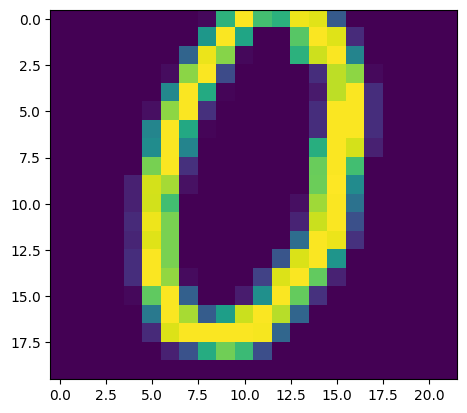

In [25]:
plt.imshow(img)

In [107]:
snc = pd.read_csv('stacked_normalized_testing.csv', header = None).to_numpy().reshape(snc.shape[0]//440, 440)
df = pd.DataFrame(snc)
df.to_csv('normalized_testing.csv', index = False)
df

In [121]:
ndf = pd.read_csv('normalized_testing.csv')
ndf.to_csv('normalized_testing_nh.csv', header = False, index = False)

In [15]:
test = pd.read_csv('1-315.csv').to_numpy()

4


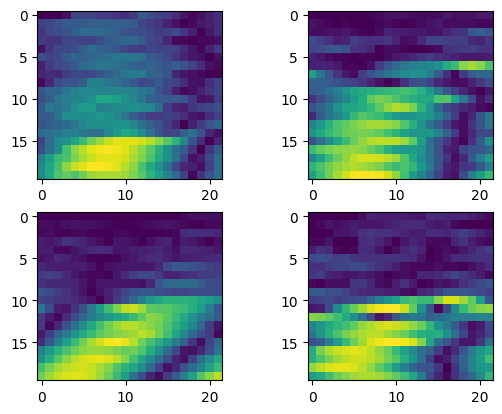

In [108]:
cl = 4

img = [test[:,i].reshape((20,22)) for i in range(315) if y[i] == cl]
fig, axs = plt.subplots(2,2)
print(cl)
axs[0,0].imshow(img[0])
axs[0,1].imshow(img[1])
axs[1,0].imshow(img[2])
axs[1,1].imshow(img[3])


In [13]:
wtest_path = 'test.csv'
mtrain_path = 'mnist_train.csv'
mtest_path = 'mnist_test.csv'

wtest = pd.read_csv(wtest_path).to_numpy()
mtrain = pd.read_csv(mtrain_path).to_numpy()
mtest = pd.read_csv(mtest_path).to_numpy()


In [21]:
mnist = np.concatenate((mtrain, mtest), axis = 0)
mnist.shape

(70000, 785)

In [40]:
labels = np.full(len(wtest), fill_value = -1, dtype = np.int64)
dict = {}
for i in range(len(wtest)):
    start = time.time()
    for j in range(len(mnist)):
        if np.array_equal(wtest[i,:], mnist[j, 1:]):
            labels[i] = mnist[j, 0]
            break
    
    print(f"Identified {labels[i]} for {i+1}/{len(wtest)} in {time.time()-start} seconds")
    
    

Identified 2 for 1/28000 in 0.20210742950439453 seconds
Identified 0 for 2/28000 in 0.14760518074035645 seconds
Identified 9 for 3/28000 in 0.03124094009399414 seconds
Identified 0 for 4/28000 in 0.2949042320251465 seconds
Identified 3 for 5/28000 in 0.21159577369689941 seconds
Identified 7 for 6/28000 in 0.09706783294677734 seconds
Identified 0 for 7/28000 in 0.0 seconds
Identified 3 for 8/28000 in 0.0950479507446289 seconds
Identified 0 for 9/28000 in 0.15744566917419434 seconds
Identified 3 for 10/28000 in 0.15697455406188965 seconds
Identified 5 for 11/28000 in 0.15671825408935547 seconds
Identified 7 for 12/28000 in 0.23354196548461914 seconds
Identified 4 for 13/28000 in 0.2345747947692871 seconds
Identified 0 for 14/28000 in 0.16712093353271484 seconds
Identified 4 for 15/28000 in 0.015624284744262695 seconds
Identified 3 for 16/28000 in 0.10052680969238281 seconds
Identified 3 for 17/28000 in 0.28287720680236816 seconds
Identified 1 for 18/28000 in 0.23823213577270508 seconds
I

5


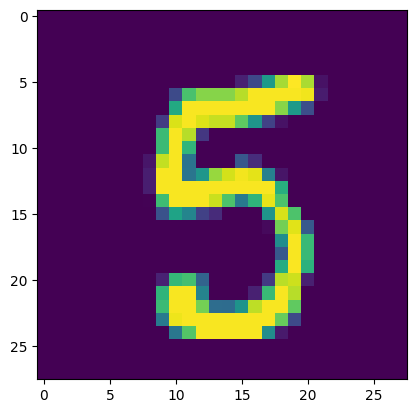

In [36]:
idx = 10
plt.imshow(wtest[idx, :].reshape((28, 28)))
print(labels[idx])

In [41]:
labels = np.transpose(labels)

In [45]:
labels = labels.reshape((28000, 1))

In [46]:
test = np.concatenate((labels, wtest), axis = 1)

In [47]:
test.shape

(28000, 785)

In [48]:
test

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

7


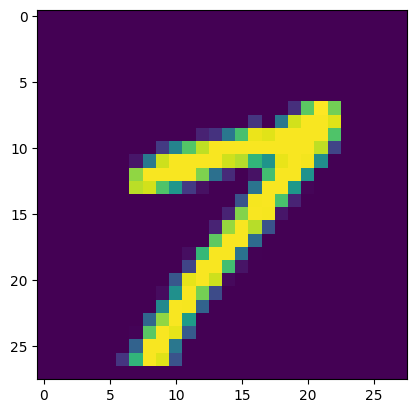

In [54]:
idx = 6009
print(test[idx, 0])
plt.imshow(test[idx, 1:].reshape((28,28)))
plt.show()

In [56]:
df = pd.DataFrame(test)
df.to_csv('test.csv', index = None)